In [31]:
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.7 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [23]:
# Загрузка датасета
data = pd.read_csv('WineQT.csv') # Замените на путь к вашему файлу
print(data.head()) # Вывод первых пяти строк датасета
print(data.describe()) # Статистическое описание данных
print(data.corr())
data = data.drop_duplicates()
X = data.drop('quality', axis=1)
y = data['quality']

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [15]:
selector = SelectKBest(f_regression, k=8)
X_selected = selector.fit_transform(X, y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [24]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение моделей
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'{'Random Forest'}: MSE = {mse}, R^2 = {r2}')

Random Forest: MSE = 0.30441877729257644, R^2 = 0.45294958878760905


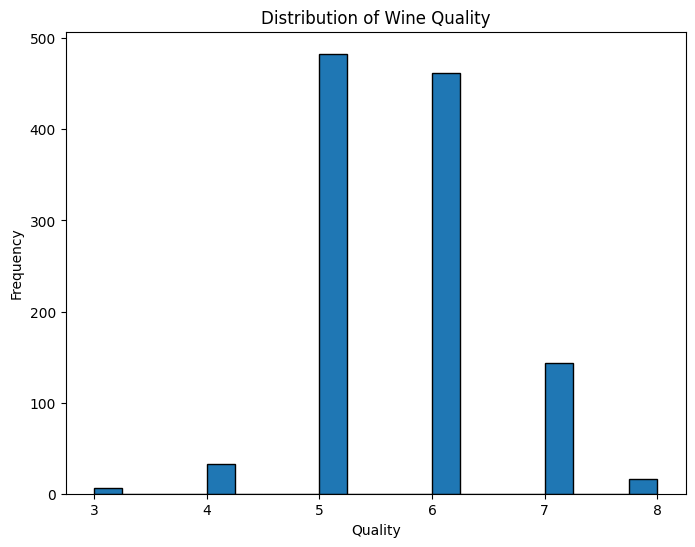

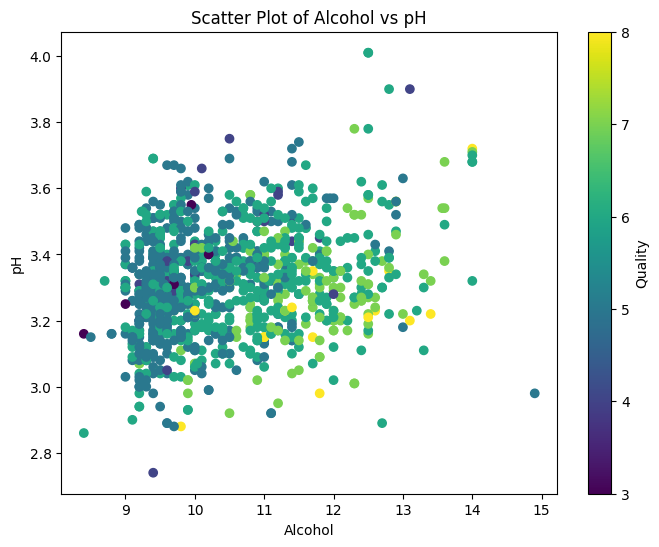

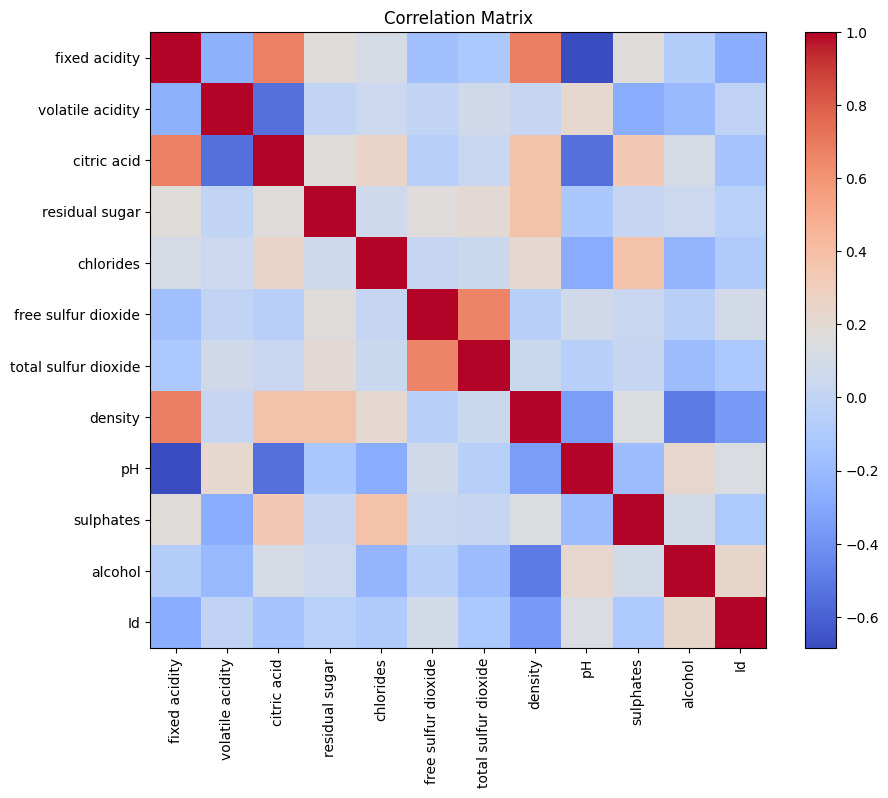

In [ ]:
import matplotlib.pyplot as plt

# Гистограмма распределения качества вина
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

# Диаграмма рассеяния признаков
plt.figure(figsize=(8, 6))
plt.scatter(X['alcohol'], X['pH'], c=y, cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.colorbar(label='Quality')
plt.title('Scatter Plot of Alcohol vs pH')
plt.show()

# Матрица корреляции признаков
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

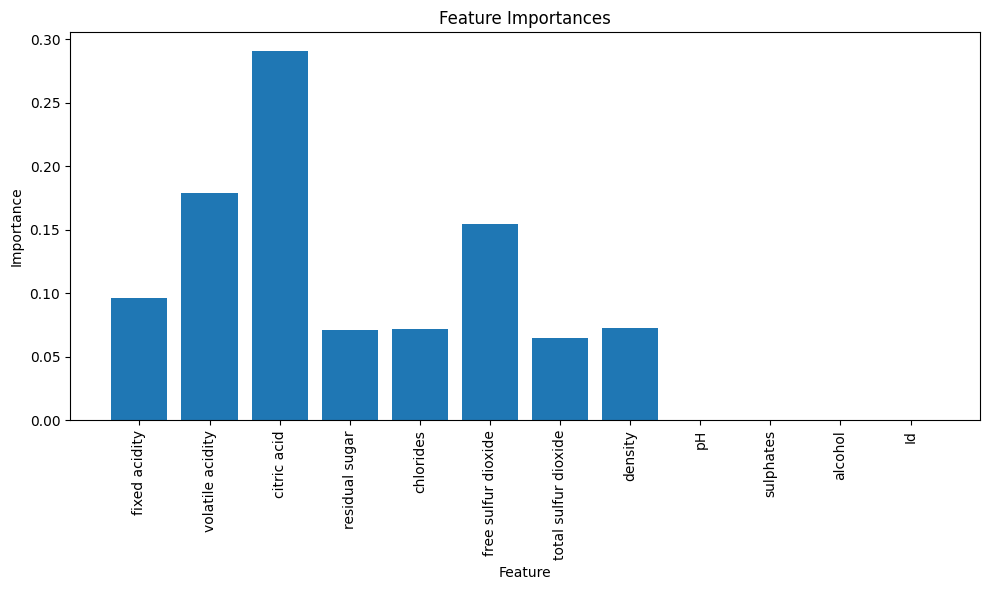

In [28]:
import matplotlib.pyplot as plt

# Заполнение нулями значений важности для всех признаков
full_importances = np.zeros(X.shape[1])
full_importances[indices[:len(importances)]] = importances

# Создание графика
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), full_importances, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


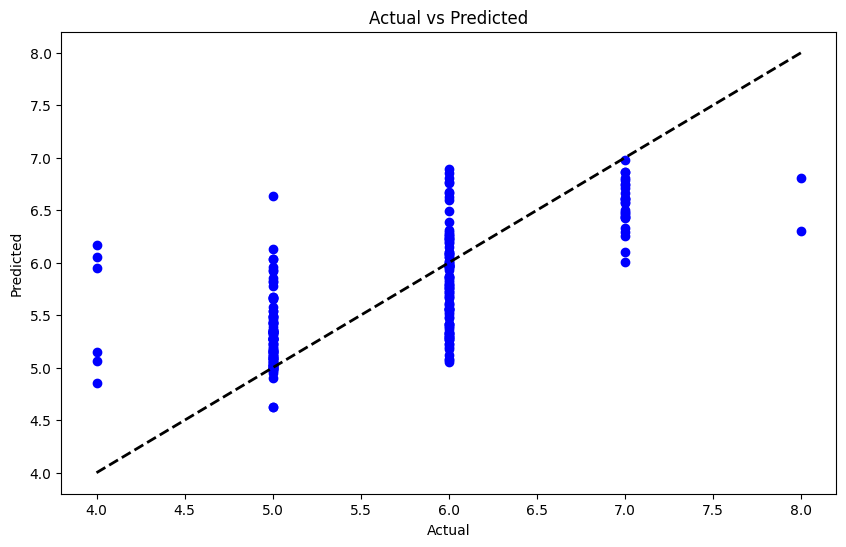

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


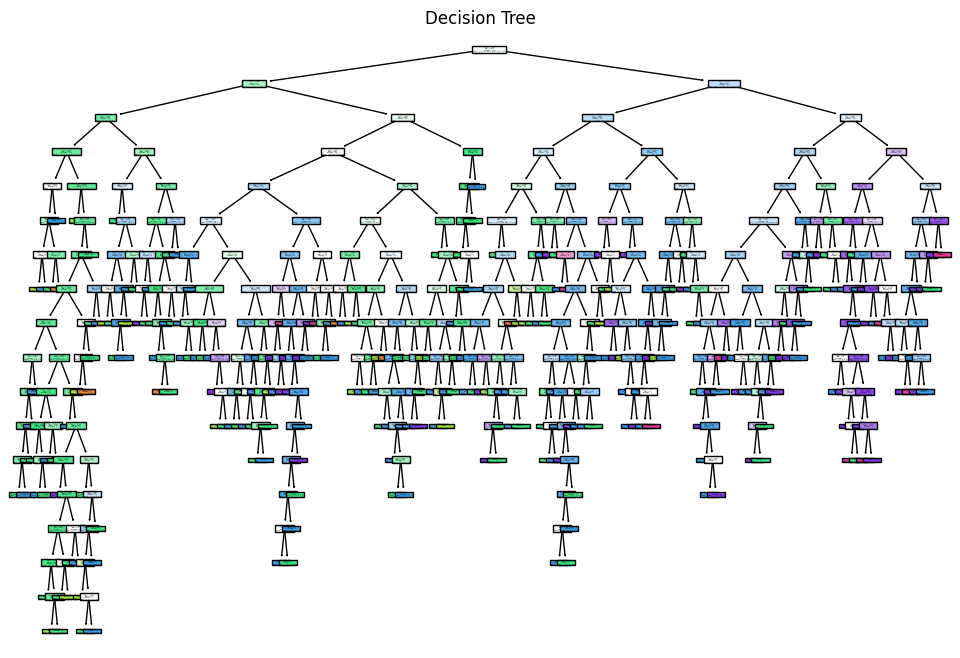

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Создание и обучение модели дерева решений
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True)
plt.title("Decision Tree")
plt.show()
